This cell imports additional libraries, including numpy and os, and sets a seed for reproducibility of random operations.

In [ ]:
import numpy as np
import os

# Set a seed for reproducibility
SEED = 42
np.random.seed(SEED)
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

This cell mounts the Google Drive to access files stored there.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This cell defines the file paths for the training, testing, and sample submission datasets and then loads them into pandas DataFrames.

In [ ]:
# Define file paths based on the project structure
train_path = '/content/drive/MyDrive/ml_project/data/train.csv'
test_path = '/content/drive/MyDrive/ml_project/data/test.csv'
sample_submission_path = '/content/drive/MyDrive/ml_project/data/sample_submission.csv'

# Load the datasets
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)
sample_submission_df = pd.read_csv(sample_submission_path)

This cell provides descriptive statistics for the numerical columns in the training DataFrame, showing count, mean, standard deviation, minimum, maximum, and quartile values.

In [ ]:
train_df.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000,15533.000000
mean,7766.000000,23.816308,1.699918,87.785225,2.442917,2.760425,2.027626,0.976968,0.613813
std,4484.135201,5.663167,0.087670,26.369144,0.530895,0.706463,0.607733,0.836841,0.602223
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3883.000000,20.000000,1.630927,66.000000,2.000000,3.000000,1.796257,0.007050,0.000000
50%,7766.000000,22.771612,1.700000,84.000000,2.342220,3.000000,2.000000,1.000000,0.566353
75%,11649.000000,26.000000,1.762921,111.600553,3.000000,3.000000,2.531456,1.582675,1.000000
max,15532.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


This code generates count plots for the categorical features to visualize the distribution of categories within each feature. It uses `seaborn.countplot` to create the plots and saves the combined figure as a high-quality image.

This cell displays the shape of the training DataFrame, showing the number of rows and columns.

In [ ]:
train_df.shape

(15533, 18)

This cell provides a concise summary of the training DataFrame, including the data types of each column and the number of non-null values.

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15533 entries, 0 to 15532
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15533 non-null  int64  
 1   Gender                          15533 non-null  object 
 2   Age                             15533 non-null  float64
 3   Height                          15533 non-null  float64
 4   Weight                          15533 non-null  float64
 5   family_history_with_overweight  15533 non-null  object 
 6   FAVC                            15533 non-null  object 
 7   FCVC                            15533 non-null  float64
 8   NCP                             15533 non-null  float64
 9   CAEC                            15533 non-null  object 
 10  SMOKE                           15533 non-null  object 
 11  CH2O                            15533 non-null  float64
 12  SCC                             

This is a markdown cell indicating the start of the missing values analysis section.

This cell calculates and prints the percentage of missing values for each column in the training DataFrame.

In [ ]:
# Count the percent of missing values in each column
missing_percent = train_df.isnull().sum() * 100 / len(train_df)



print(missing_percent)

id                                0.0
Gender                            0.0
Age                               0.0
Height                            0.0
Weight                            0.0
family_history_with_overweight    0.0
FAVC                              0.0
FCVC                              0.0
NCP                               0.0
CAEC                              0.0
SMOKE                             0.0
CH2O                              0.0
SCC                               0.0
FAF                               0.0
TUE                               0.0
CALC                              0.0
MTRANS                            0.0
WeightCategory                    0.0
dtype: float64


This is an empty code cell. It can be used for further analysis or code related to missing values if needed.

This is a markdown cell indicating the start of the numerical data analysis section.

This cell identifies and prints the names of the numerical features in the training DataFrame and displays the first few rows of these features.

In [ ]:
numerical_features = [feature for feature in train_df.columns if train_df[feature].dtype != "O" ]
print(len(numerical_features))
train_df[numerical_features]

9


,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721
...,...,...,...,...,...,...,...,...,...
15528,15528,18.000000,1.700000,50.000000,2.000000,3.000000,2.000000,1.000000,2.000000
15529,15529,18.000000,1.763101,55.523481,2.786008,3.000000,1.962646,0.028202,1.561272
15530,15530,19.010211,1.686936,49.660995,1.053534,3.452590,1.000000,2.001230,1.000000
15531,15531,22.777890,1.805445,85.228116,2.000000,2.092179,2.452986,0.796770,0.000000


This cell identifies and counts the number of discrete numerical features (features with less than 25 unique values).

In [ ]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables

discrete_feature=[feature for feature in numerical_features if len(train_df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


This code generates histograms for the numerical features to visualize their distributions. It creates a 3x3 grid of histograms and saves the combined figure.

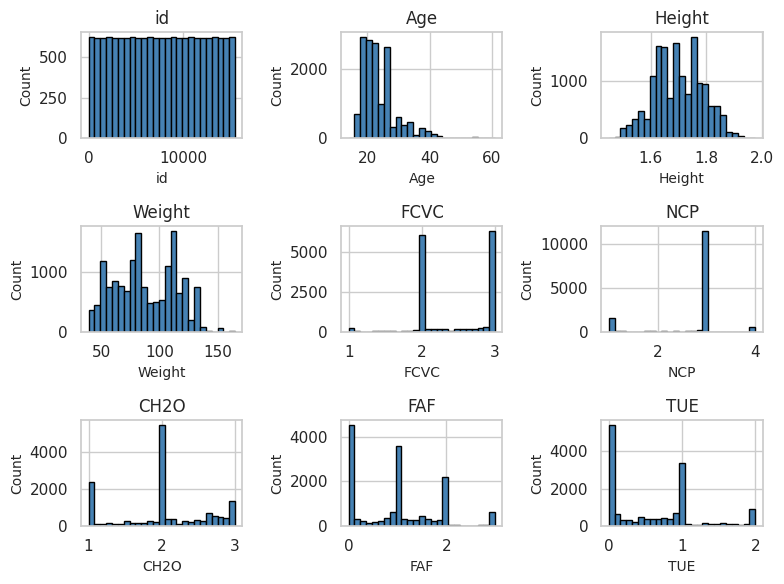

In [ ]:
import matplotlib.pyplot as plt

# Make a copy once outside the loop
data = train_df.copy()

# Create a 3x3 grid for 9 histograms
fig, axes = plt.subplots(3, 3, figsize=(8, 6))

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop over numerical features
for i, feature in enumerate(numerical_features[:9]):  # just 9 features
    ax = axes[i]
    ax.hist(data[feature].dropna(), bins=25, color='steelblue', edgecolor='black')
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)
    ax.set_title(feature, fontsize=12)

# If there are fewer than 9 features, remove the extra subplots
for j in range(len(numerical_features), 9):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the combined figure for LaTeX
plt.savefig("numerical_features_hist.png", dpi=300, bbox_inches='tight')

# Show the figure
plt.show()

This code generates boxplots for the numerical features after applying a log transformation to visualize their distributions and identify potential outliers. It creates a 3x3 grid of boxplots and saves the combined figure.

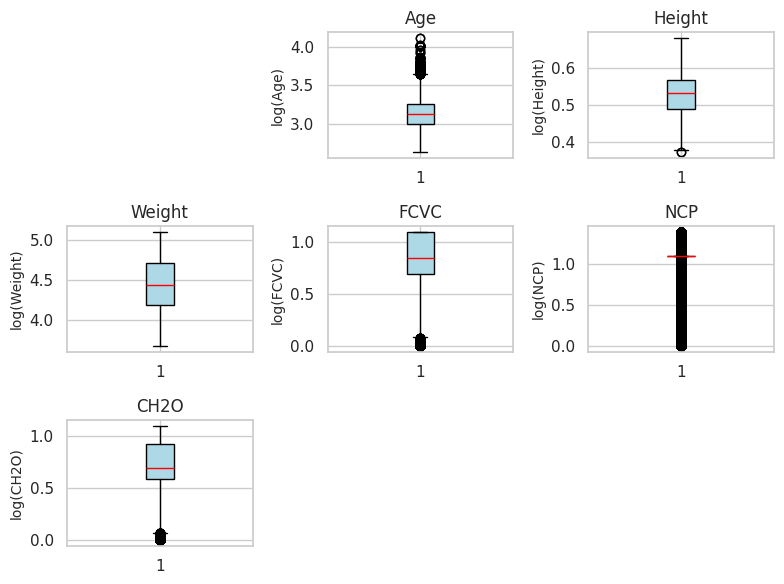

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Copy the dataset
data = train_df.copy()

# Create a 3x3 grid for 9 boxplots
fig, axes = plt.subplots(3, 3, figsize=(8, 6))
axes = axes.flatten()

# Loop through numerical features
for i, feature in enumerate(numerical_features[:9]):  # only first 9 features
    ax = axes[i]

    # Get the feature data
    feature_data = data[feature].dropna()

    # Skip if there are zeros or negative values (log undefined)
    if (feature_data <= 0).any():
        ax.axis('off')  # leave the subplot blank
        continue

    # Apply log transformation
    transformed = np.log(feature_data)

    # Create the boxplot
    ax.boxplot(
        transformed,
        patch_artist=True,
        boxprops=dict(facecolor='lightblue', color='black'),
        medianprops=dict(color='red')
    )

    # Label and title
    ax.set_title(feature, fontsize=12)
    ax.set_ylabel("log(" + feature + ")", fontsize=10)

# Remove empty subplots if fewer than 9 features
for j in range(len(numerical_features), 9):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()

# Save as high-quality image for LaTeX
plt.savefig("log_boxplots_grid.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

This cell identifies and prints the names of the categorical features in the training DataFrame.

In [ ]:
categorical_features=[feature for feature in train_df.columns if train_df[feature].dtypes=='O']
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'WeightCategory']

This cell iterates through the categorical features and prints the name of each feature along with the number of unique categories it contains.

In [ ]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(train_df[feature].unique())))

The feature is Gender and number of categories are 2
The feature is family_history_with_overweight and number of categories are 2
The feature is FAVC and number of categories are 2
The feature is CAEC and number of categories are 4
The feature is SMOKE and number of categories are 2
The feature is SCC and number of categories are 2
The feature is CALC and number of categories are 3
The feature is MTRANS and number of categories are 5
The feature is WeightCategory and number of categories are 7


This code generates count plots for the categorical features to visualize the distribution of categories within each feature. It uses `seaborn.countplot` to create the plots and saves the combined figure as a high-quality image.

/tmp/ipython-input-2932731928.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, ax=ax, palette="viridis", edgecolor='black')
/tmp/ipython-input-2932731928.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, ax=ax, palette="viridis", edgecolor='black')
/tmp/ipython-input-2932731928.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, ax=ax, palette="viridis", edgecolor='black')
/tmp/ipython-input-2932731928.py:16: FutureWarning: 

Passing `palette` without assigning `

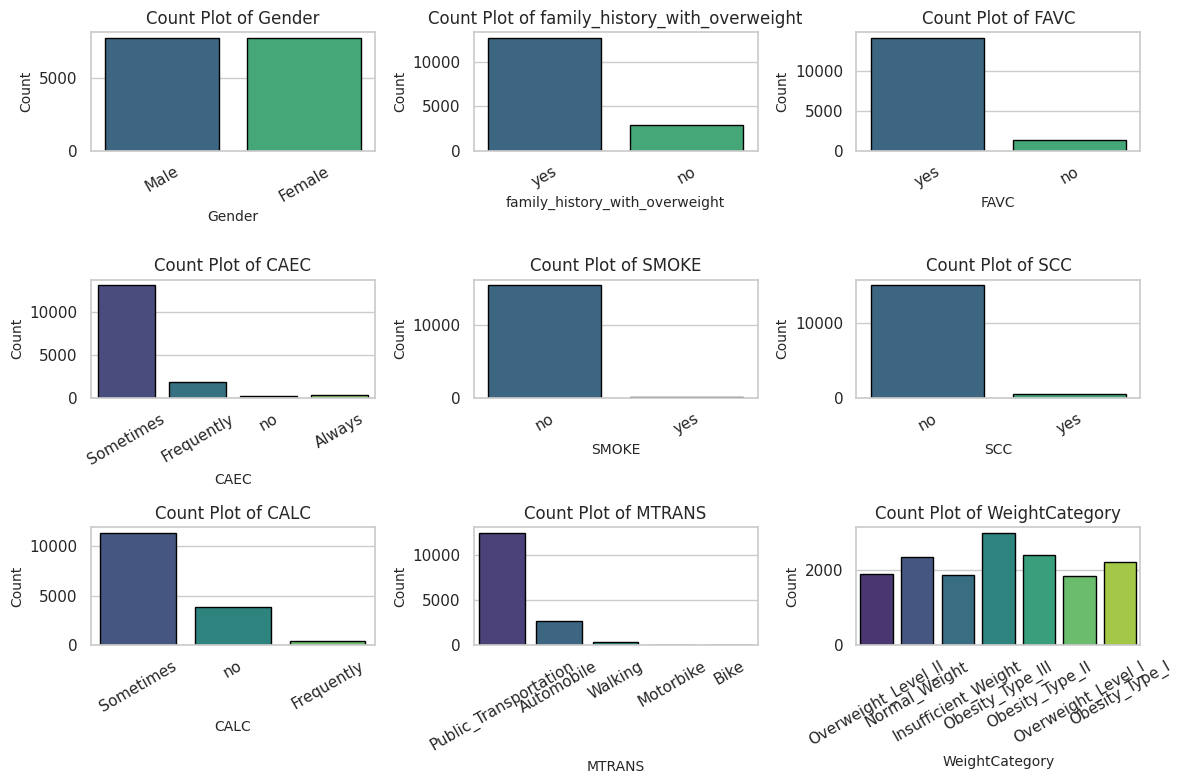

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Copy the dataset once
data = train_df.copy()

# Create a 3x3 grid (for up to 9 categorical features)
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
axes = axes.flatten()

# Loop through categorical features
for i, feature in enumerate(categorical_features[:9]):  # limit to first 9
    ax = axes[i]

    # Plot count plot
    sns.countplot(x=feature, data=data, ax=ax, palette="viridis", edgecolor='black')

    # Add title and labels
    ax.set_title(f"Count Plot of {feature}", fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel("Count", fontsize=10)

    # Rotate x labels if they overlap
    ax.tick_params(axis='x', rotation=30)

# Remove extra empty subplots if fewer than 9 features
for j in range(len(categorical_features), 9):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save figure for LaTeX
plt.savefig("categorical_countplots_grid.png", dpi=300, bbox_inches='tight')

# Display
plt.show()

In [ ]:
print("Features:", train_df.columns, "\n")
print("Numerical Features:", numerical_features, "\n")
print("Categorical Features:", categorical_features)


Features: Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS',
       'WeightCategory'],
      dtype='object') 

Numerical Features: ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'] 

Categorical Features: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'WeightCategory']


## Numerical vs. numerical analysis



**Reasoning**:
Generate scatter plots for pairs of numerical features to visualize their pairwise relationships and a heatmap of the correlation matrix of the numerical features to visualize the strength and direction of linear relationships between them.



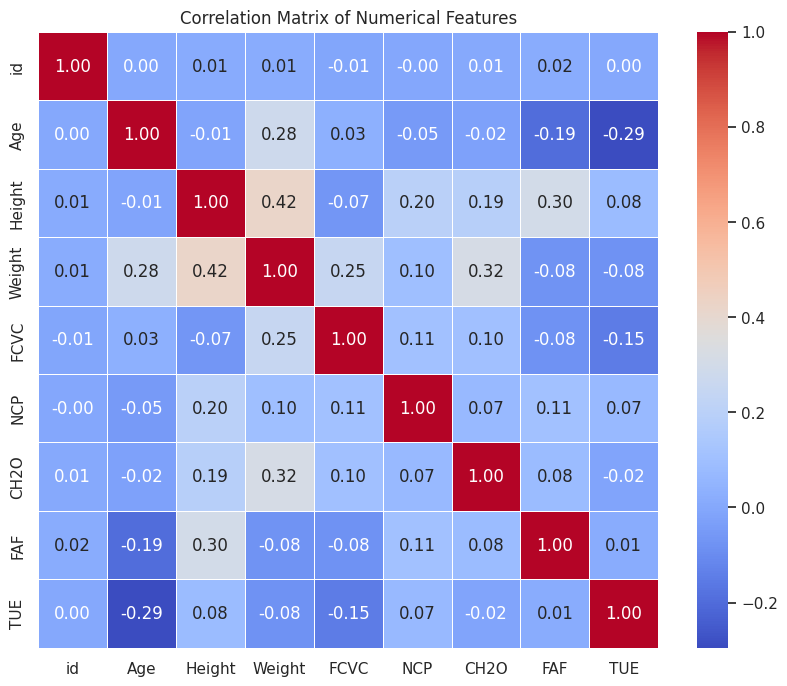

In [ ]:


# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = train_df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix of Numerical Features")
plt.savefig("numerical_features_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()